<a href="https://colab.research.google.com/github/DJLee68/MachineLearningProject/blob/master/Assignment06/Assignment06_DJLee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

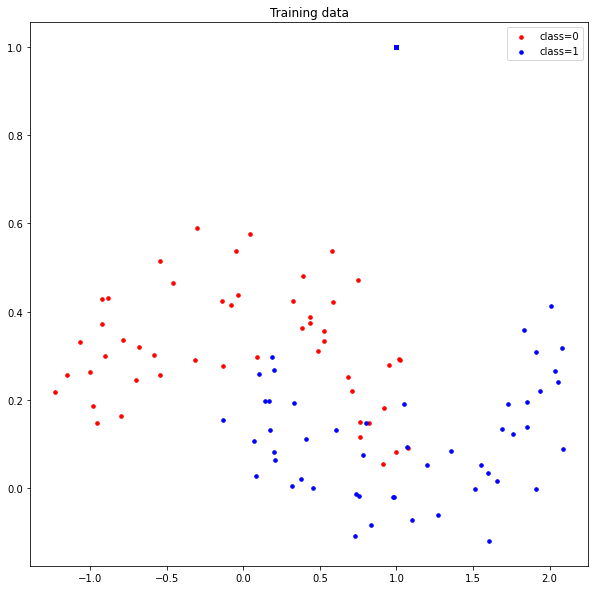

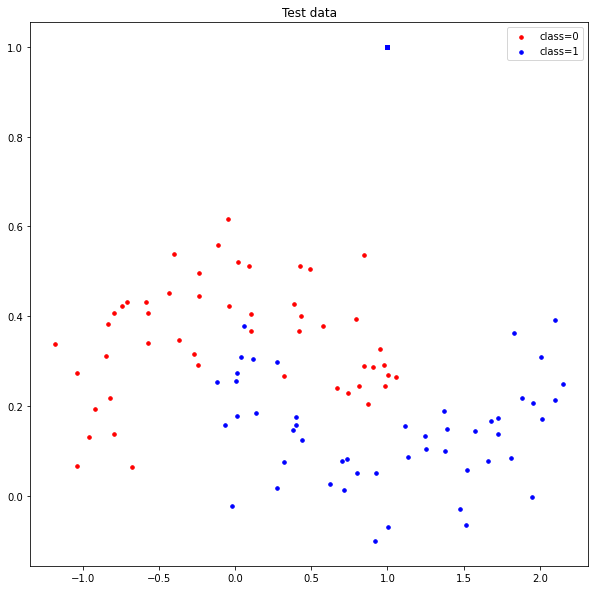

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import data with numpy
data_train  = np.loadtxt('training.txt', delimiter=',')
data_test   = np.loadtxt('testing.txt', delimiter=',')

# number of training data
number_data_train   = data_train.shape[0] 
number_data_test    = data_test.shape[0]

# training data
x1_train            = data_train[:,0] # feature 1
x2_train            = data_train[:,1] # feature 2
idx_class0_train    = (data_train[:,2]==0) # index of class0
idx_class1_train    = (data_train[:,2]==1) # index of class1

# testing data
x1_test             = data_test[:,0] # feature 1
x2_test             = data_test[:,1] # feature 2
idx_class0_test     = (data_test[:,2]==0) # index of class0
idx_class1_test     = (data_test[:,2]==1) # index of class1

plt.figure(1,figsize=(10,10))
plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

plt.figure(2,figsize=(10,10))
plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test[idx_class1_test], x2_test[idx_class1_test], s=50, c='b', marker='.', label='class=1')
plt.title('Test data')
plt.legend()
plt.show()


In [2]:
def make_x(x1, x2): #{
  X = np.ones([len(x1), 100])
  for i in range(10): #{
    for j in range(10): #{
      X[:, i*10+j] = np.multiply(np.power(x1, i), np.power(x2, j))    
    #}    
  #}
  return X
#}

In [3]:
# sigmoid function
def sigmoid(z):
    sigmoid_f = 1 / (1+np.exp(-z))
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(np.dot(X,w))
    return p.reshape(-1,1)

# loss function definition
def loss_logreg(y_pred,y, theta, lamb): 
    n = len(y)
    raw = (np.dot(-y.T, np.log(y_pred+0.0000001)) - np.dot((1-y).T, np.log(1-y_pred+0.0000001))) / n
    reg = 0
    for i in range(100): #{
      reg+=np.square(theta[i])
    #}  
    loss = raw + (lamb * reg) / 2
    return loss

# gradient function definition
def grad_loss(y_pred, y, X):
    n = len(y)
    grad = np.dot(X.T, (y_pred - y)*2) / n
    return grad

# gradient descent function definition
def grad_desc(X, X_test, y, y_test, theta_init, lamb, tau=1e-4, max_iter=500):
    L_iters = np.zeros([max_iter]) # record the loss values
    L_iters_test = np.zeros([max_iter]) # record the loss values 
    theta = theta_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred = f_pred(X, theta) # linear predicition function
        y_pred_test = f_pred(X_test, theta) # linear predicition function
        grad_f = grad_loss(y_pred, y, X) # gradient of the loss
        theta = theta - tau*(grad_f + lamb*theta) # update rule of gradient descent
        L_iters[i] = loss_logreg(y_pred, y, theta, lamb) # save the current loss value
        L_iters_test[i] = loss_logreg(y_pred_test, y_test, theta, lamb) # save the current loss value 

    return theta, L_iters, L_iters_test

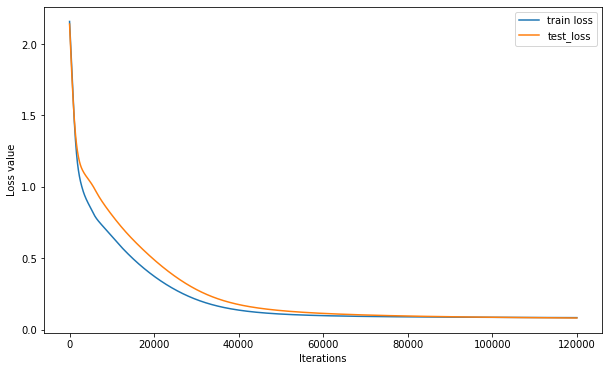

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


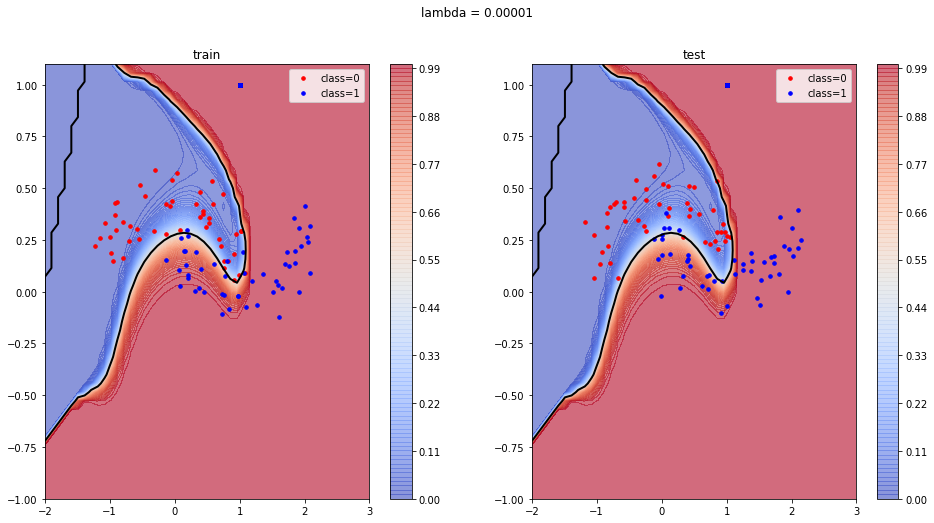

In [4]:
import time
import math
# construct the data matrix X, and label vector y

data1_train = x1_train
data2_train = x2_train
data1_test = x1_test
data2_test = x2_test

y_train = data_train[:,2][:,None] # label 
y_test = data_test[:,2][:, None]
theta = np.random.randint(1,10, size=(100,1))
X = make_x(data1_train, data2_train)
X_test = make_x(data1_test, data2_test)
# run gradient descent algorithm
start = time.time()

tau = 1e-2
max_iter1 = 120000
lamb = 0.00001
theta, L_iters1, L_iters_test1 = grad_desc(X, X_test, y_train, y_test, theta, lamb, tau, max_iter1)
pred1 = f_pred(X, theta)
pred1_test = f_pred(X_test, theta)
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter1)), L_iters1, label='train loss')
plt.plot(np.array(range(max_iter1)), L_iters_test1, label='test_loss')
plt.legend(loc=1)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


# compute values p(x) for multiple data points x
x1_min, x1_max = x1_train.min(), x1_train.max() # min and max of grade 1
x2_min, x2_max = x2_train.min(), x2_train.max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(-2, 3), np.linspace(-1, 1.1)) # create meshgrid

data1 = xx1.reshape(-1)
data2 = xx2.reshape(-1)

X2 = make_x(data1, data2)

p2 = f_pred(X2, theta)
p2_1 = p2.reshape(xx1.shape[0], xx2.shape[0])

# plot
fig = plt.figure(4,figsize=(16, 8))

plt.subplot(1,2,1)
ax = plt.contourf(xx1,xx2,p2_1,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_1, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('train')

plt.subplot(1,2,2)
ax = plt.contourf(xx1,xx2,p2_1,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test[idx_class1_test], x2_test[idx_class1_test], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_1, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('test')

fig.suptitle(f'lambda = 0.00001')
plt.show()

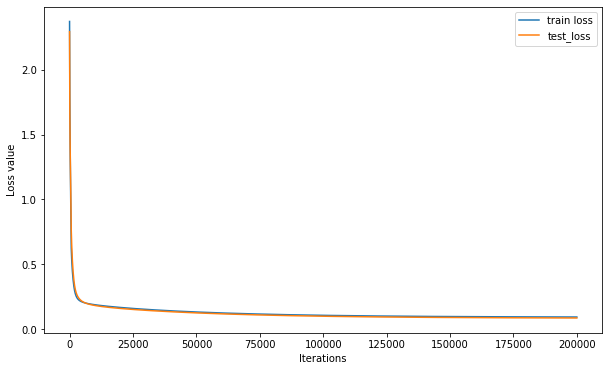

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


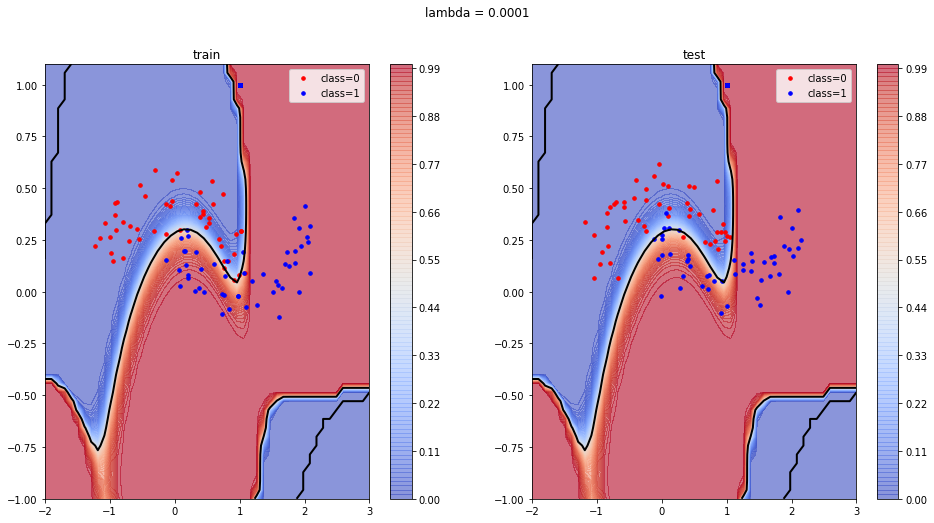

In [27]:
import time
import math
# construct the data matrix X, and label vector y

data1_train = x1_train
data2_train = x2_train
data1_test = x1_test
data2_test = x2_test

y_train = data_train[:,2][:,None] # label 
y_test = data_test[:,2][:, None]
theta = np.random.randint(1,10, size=(100,1))
X = make_x(data1_train, data2_train)
X_test = make_x(data1_test, data2_test)
# run gradient descent algorithm
start = time.time()

tau = 1e-1
max_iter2 = 200000
lamb = 0.0001
theta, L_iters2, L_iters_test2 = grad_desc(X, X_test, y_train, y_test, theta, lamb, tau, max_iter2)
pred2 = f_pred(X, theta)
pred2_test = f_pred(X_test, theta)

# plot
plt.figure(5, figsize=(10,6))
plt.plot(np.array(range(max_iter2)), L_iters2, label='train loss')
plt.plot(np.array(range(max_iter2)), L_iters_test2, label='test_loss')
plt.legend(loc=1)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


# compute values p(x) for multiple data points x
x1_min, x1_max = x1_train.min(), x1_train.max() # min and max of grade 1
x2_min, x2_max = x2_train.min(), x2_train.max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(-2, 3), np.linspace(-1, 1.1)) # create meshgrid

data1 = xx1.reshape(-1)
data2 = xx2.reshape(-1)

X2 = make_x(data1, data2)

p2 = f_pred(X2, theta)
p2_2 = p2.reshape(xx1.shape[0], xx2.shape[0])

# plot
fig = plt.figure(6,figsize=(16, 8))

plt.subplot(1,2,1)
ax = plt.contourf(xx1,xx2,p2_2,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_2, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('train')

plt.subplot(1,2,2)
ax = plt.contourf(xx1,xx2,p2_2,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test[idx_class1_test], x2_test[idx_class1_test], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_2, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('test')

fig.suptitle(f'lambda = 0.0001')
plt.show()

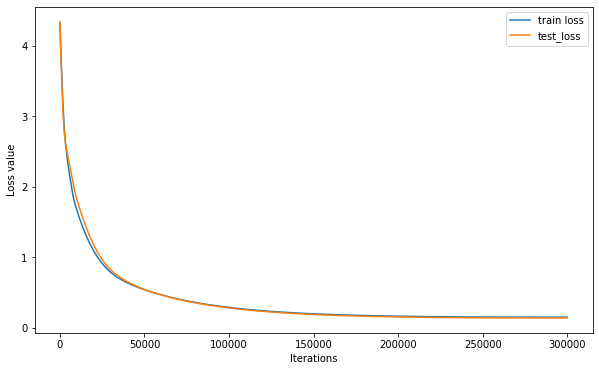

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


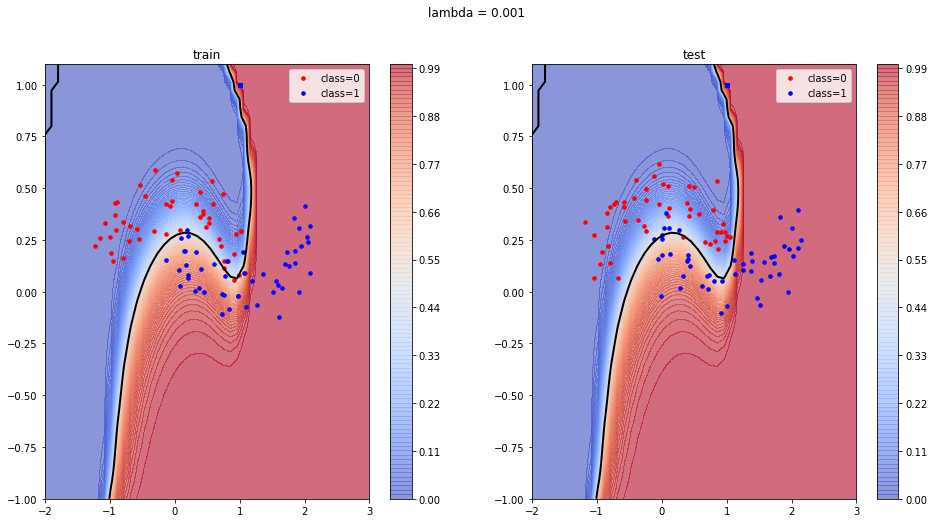

In [6]:
import time
import math
# construct the data matrix X, and label vector y

data1_train = x1_train
data2_train = x2_train
data1_test = x1_test
data2_test = x2_test

y_train = data_train[:,2][:,None] # label 
y_test = data_test[:,2][:, None]
theta = np.random.randint(1,10, size=(100,1))
X = make_x(data1_train, data2_train)
X_test = make_x(data1_test, data2_test)
# run gradient descent algorithm
start = time.time()

tau = 1e-2
max_iter3 = 300000
lamb = 0.001
theta, L_iters3, L_iters_test3 = grad_desc(X, X_test, y_train, y_test, theta, lamb, tau, max_iter3)
pred3 = f_pred(X, theta)
pred3_test = f_pred(X_test, theta)

# plot
plt.figure(7, figsize=(10,6))
plt.plot(np.array(range(max_iter3)), L_iters3, label='train loss')
plt.plot(np.array(range(max_iter3)), L_iters_test3, label='test_loss')
plt.legend(loc=1)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


# compute values p(x) for multiple data points x
x1_min, x1_max = x1_train.min(), x1_train.max() # min and max of grade 1
x2_min, x2_max = x2_train.min(), x2_train.max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(-2, 3), np.linspace(-1, 1.1)) # create meshgrid

data1 = xx1.reshape(-1)
data2 = xx2.reshape(-1)

X2 = make_x(data1, data2)

p2 = f_pred(X2, theta)
p2_3 = p2.reshape(xx1.shape[0], xx2.shape[0])

# plot
fig = plt.figure(8,figsize=(16, 8))

plt.subplot(1,2,1)
ax = plt.contourf(xx1,xx2,p2_3,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_3, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('train')

plt.subplot(1,2,2)
ax = plt.contourf(xx1,xx2,p2_3,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test[idx_class1_test], x2_test[idx_class1_test], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_3, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('test')

fig.suptitle(f'lambda = 0.001')
plt.show()

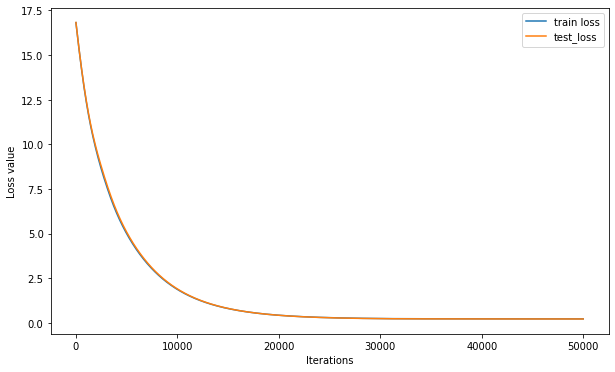

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


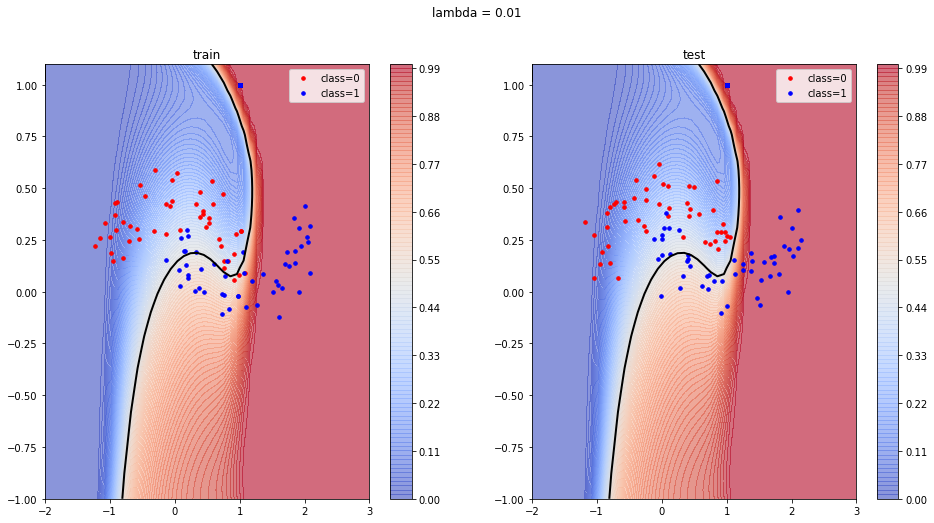

In [7]:
import time
import math
# construct the data matrix X, and label vector y

data1_train = x1_train
data2_train = x2_train
data1_test = x1_test
data2_test = x2_test

y_train = data_train[:,2][:,None] # label 
y_test = data_test[:,2][:, None]
theta = np.random.randint(1,10, size=(100,1))
X = make_x(data1_train, data2_train)
X_test = make_x(data1_test, data2_test)
# run gradient descent algorithm
start = time.time()

tau = 1e-2
max_iter4 = 50000
lamb = 0.01
theta, L_iters4, L_iters_test4 = grad_desc(X, X_test, y_train, y_test, theta, lamb, tau, max_iter4)
pred4 = f_pred(X, theta)
pred4_test = f_pred(X_test, theta)

# plot
plt.figure(9, figsize=(10,6))
plt.plot(np.array(range(max_iter4)), L_iters4, label='train loss')
plt.plot(np.array(range(max_iter4)), L_iters_test4, label='test_loss')
plt.legend(loc=1)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


# compute values p(x) for multiple data points x
x1_min, x1_max = x1_train.min(), x1_train.max() # min and max of grade 1
x2_min, x2_max = x2_train.min(), x2_train.max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(-2, 3), np.linspace(-1, 1.1)) # create meshgrid

data1 = xx1.reshape(-1)
data2 = xx2.reshape(-1)

X2 = make_x(data1, data2)

p2 = f_pred(X2, theta)
p2_4 = p2.reshape(xx1.shape[0], xx2.shape[0])

# plot
fig = plt.figure(10,figsize=(16, 8))

plt.subplot(1,2,1)
ax = plt.contourf(xx1,xx2,p2_4,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_4, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('train')

plt.subplot(1,2,2)
ax = plt.contourf(xx1,xx2,p2_4,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test[idx_class1_test], x2_test[idx_class1_test], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_4, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('test')

fig.suptitle(f'lambda = 0.01')
plt.show()

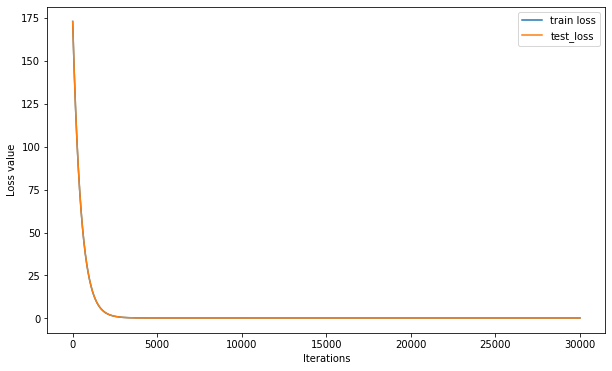

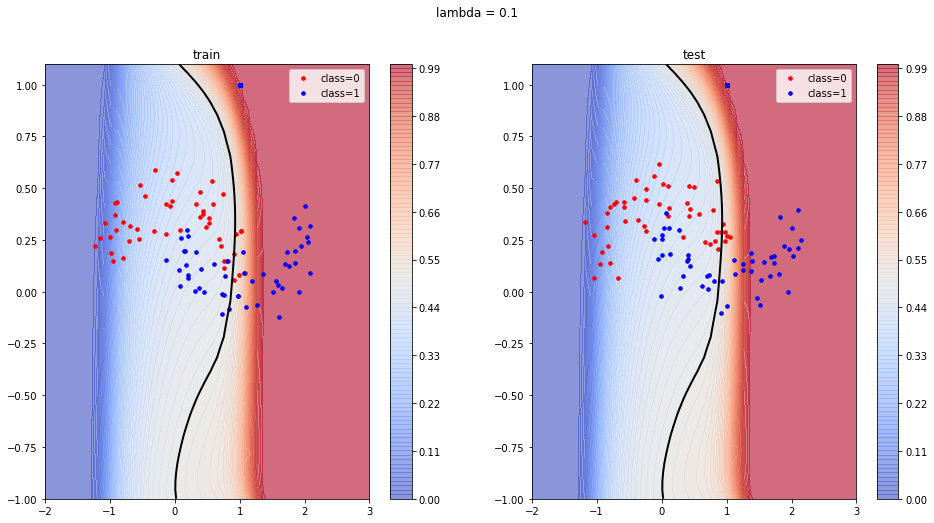

In [8]:
import time
import math
# construct the data matrix X, and label vector y

data1_train = x1_train
data2_train = x2_train
data1_test = x1_test
data2_test = x2_test

y_train = data_train[:,2][:,None] # label 
y_test = data_test[:,2][:, None]
theta = np.random.randint(1,10, size=(100,1))
X = make_x(data1_train, data2_train)
X_test = make_x(data1_test, data2_test)
# run gradient descent algorithm
start = time.time()

tau = 1e-2
max_iter5 = 30000
lamb = 0.1
theta, L_iters5, L_iters_test5 = grad_desc(X, X_test, y_train, y_test, theta, lamb, tau, max_iter5)
pred5 = f_pred(X, theta)
pred5_test = f_pred(X_test, theta)

# plot
plt.figure(11, figsize=(10,6))
plt.plot(np.array(range(max_iter5)), L_iters5, label='train loss')
plt.plot(np.array(range(max_iter5)), L_iters_test5, label='test_loss')
plt.legend(loc=1)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


# compute values p(x) for multiple data points x
x1_min, x1_max = x1_train.min(), x1_train.max() # min and max of grade 1
x2_min, x2_max = x2_train.min(), x2_train.max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(-2, 3), np.linspace(-1, 1.1)) # create meshgrid

data1 = xx1.reshape(-1)
data2 = xx2.reshape(-1)

X2 = make_x(data1, data2)

p2 = f_pred(X2, theta)
p2_5 = p2.reshape(xx1.shape[0], xx2.shape[0])

# plot
fig = plt.figure(12,figsize=(16, 8))

plt.subplot(1,2,1)
ax = plt.contourf(xx1,xx2,p2_5,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_5, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('train')

plt.subplot(1,2,2)
ax = plt.contourf(xx1,xx2,p2_5,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test[idx_class1_test], x2_test[idx_class1_test], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_5, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('test')

fig.suptitle(f'lambda = 0.1')
plt.show()

In [9]:
def get_acc(pred, label): #{
  n = len(label)
  p = []
  idx_wrong=0
  for i in pred: #{
    if i>=0.5: p.append(1)
    else: p.append(0)    
  #}
  for i in range(len(p)):#{
    if p[i] != label[i]: idx_wrong+=1    
  #}
  return (((n-idx_wrong)/n)*100)
#}

In [10]:
# compute the accuracy of the classifier
idx = y_train

print('lambda       Training Accuracy(%)')
print('0.00001:     ',  get_acc(pred1, idx))
print('0.0001:      ',  get_acc(pred2, idx))
print('0.001:       ',  get_acc(pred3, idx))
print('0.01:        ',  get_acc(pred4, idx))
print('0.1:         ',  get_acc(pred5, idx))

lambda       Training Accuracy(%)
0.00001:      98.0
0.0001:       98.0
0.001:        97.5
0.01:         94.0
0.1:          85.5


In [11]:
# compute the accuracy of the classifier
idx = y_test

print('lambda       Testing Accuracy(%)')
print('0.00001:     ',  get_acc(pred1_test, idx))
print('0.0001:      ',  get_acc(pred2_test, idx))
print('0.001:       ',  get_acc(pred3_test, idx))
print('0.01:        ',  get_acc(pred4_test, idx))
print('0.1:         ',  get_acc(pred5_test, idx))

lambda       Testing Accuracy(%)
0.00001:      97.0
0.0001:       97.0
0.001:        96.5
0.01:         95.0
0.1:          86.5


## Output using the dataset


## 1. Plot the training data [0.5pt]
<ht>

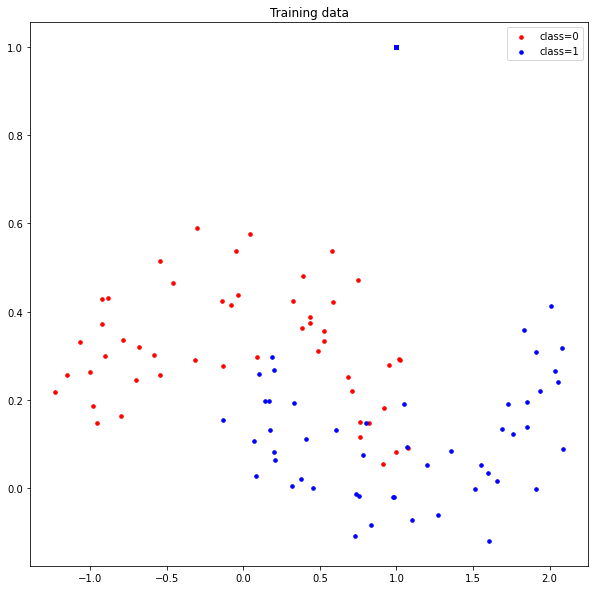

In [12]:
plt.figure(1,figsize=(10,10))
plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()


## 2. Plot the testing data [0.5pt]
<ht>

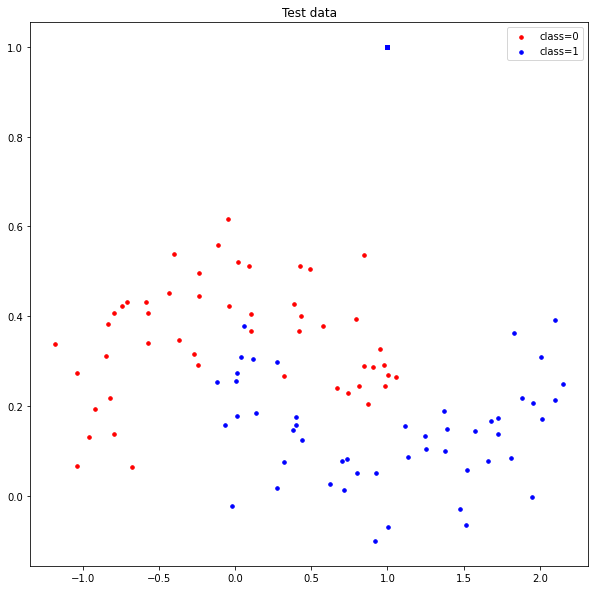

In [13]:
plt.figure(2,figsize=(10,10))
plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test[idx_class1_test], x2_test[idx_class1_test], s=50, c='b', marker='.', label='class=1')
plt.title('Test data')
plt.legend()
plt.show()

## 3. Plot the learning curve with λ=0.00001[1pt]


<ht>

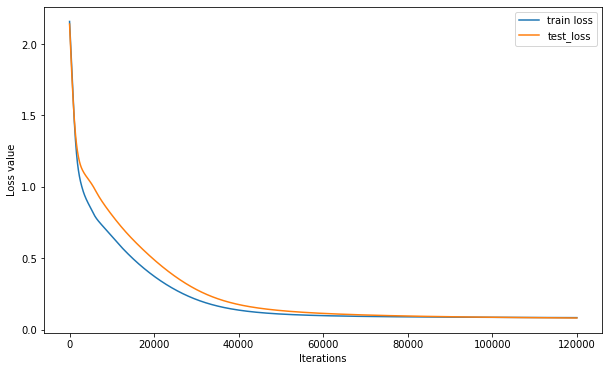

In [14]:
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter1)), L_iters1, label='train loss')
plt.plot(np.array(range(max_iter1)), L_iters_test1, label='test_loss')
plt.legend(loc=1)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 4. Plot the learning curve with λ=0.0001

<ht>

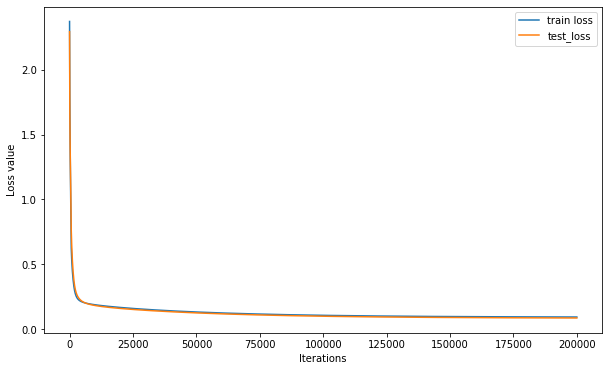

In [28]:
plt.figure(5, figsize=(10,6))
plt.plot(np.array(range(max_iter2)), L_iters2, label='train loss')
plt.plot(np.array(range(max_iter2)), L_iters_test2, label='test_loss')
plt.legend(loc=1)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


## 5. Plot the learning curve with λ=0.001
<ht>

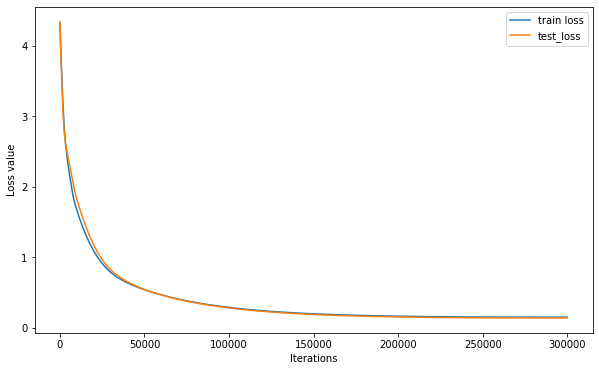

In [16]:
plt.figure(7, figsize=(10,6))
plt.plot(np.array(range(max_iter3)), L_iters3, label='train loss')
plt.plot(np.array(range(max_iter3)), L_iters_test3, label='test_loss')
plt.legend(loc=1)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


## 6. Plot the learning curve with λ=0.01
<ht>

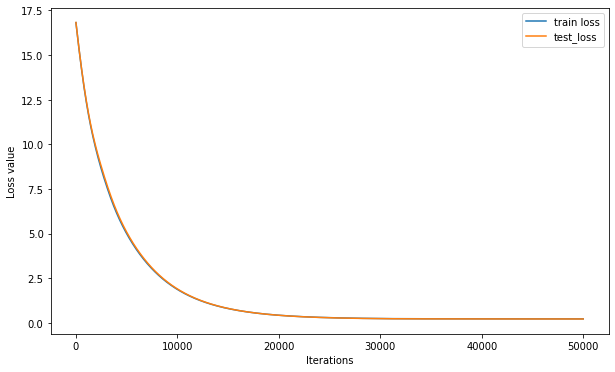

In [17]:
plt.figure(9, figsize=(10,6))
plt.plot(np.array(range(max_iter4)), L_iters4, label='train loss')
plt.plot(np.array(range(max_iter4)), L_iters_test4, label='test_loss')
plt.legend(loc=1)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 7. Plot the learning curve with λ=0.1

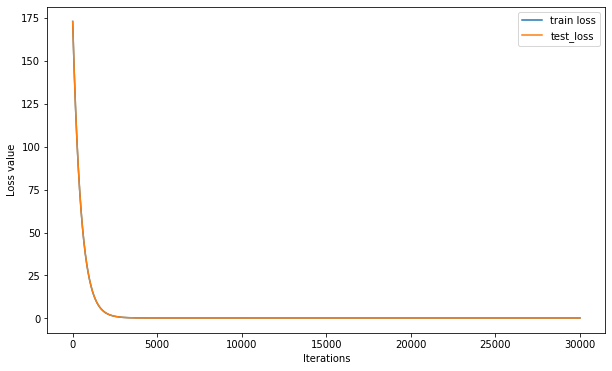

In [18]:
plt.figure(11, figsize=(10,6))
plt.plot(np.array(range(max_iter5)), L_iters5, label='train loss')
plt.plot(np.array(range(max_iter5)), L_iters_test5, label='test_loss')
plt.legend(loc=1)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


## 8. Plot the probability map of the obtained classifier with λ=0.00001

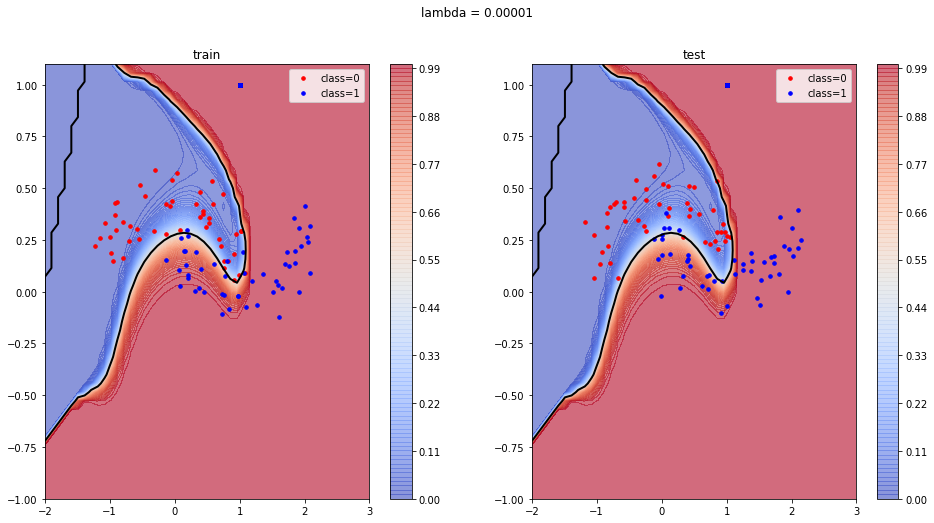

In [19]:
fig = plt.figure(4,figsize=(16, 8))

plt.subplot(1,2,1)
ax = plt.contourf(xx1,xx2,p2_1,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_1, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('train')

plt.subplot(1,2,2)
ax = plt.contourf(xx1,xx2,p2_1,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test[idx_class1_test], x2_test[idx_class1_test], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_1, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('test')

fig.suptitle(f'lambda = 0.00001')
plt.show()

## 9. Plot the probability map of the obtained classifier with λ=0.0001

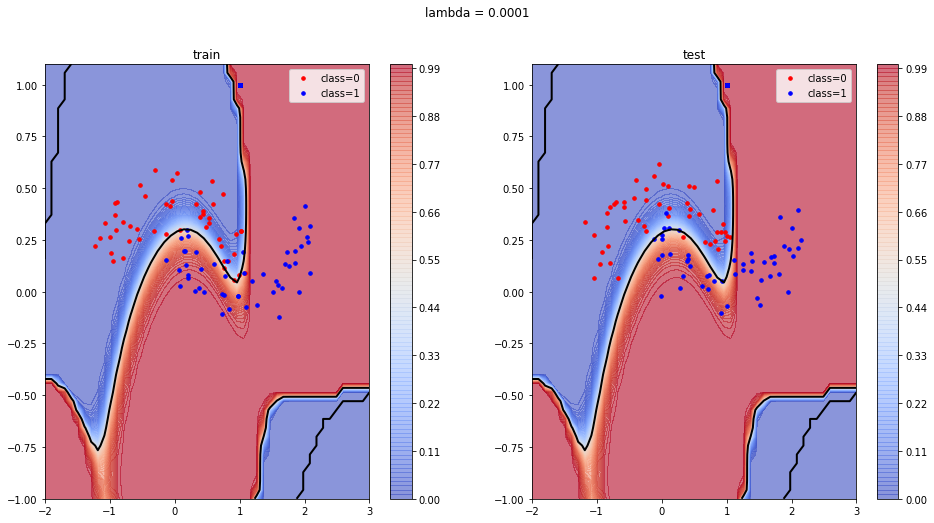

In [29]:
fig = plt.figure(6,figsize=(16, 8))

plt.subplot(1,2,1)
ax = plt.contourf(xx1,xx2,p2_2,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_2, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('train')

plt.subplot(1,2,2)
ax = plt.contourf(xx1,xx2,p2_2,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test[idx_class1_test], x2_test[idx_class1_test], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_2, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('test')

fig.suptitle(f'lambda = 0.0001')
plt.show()

## 10. Plot the probability map of the obtained classifier with λ=0.001


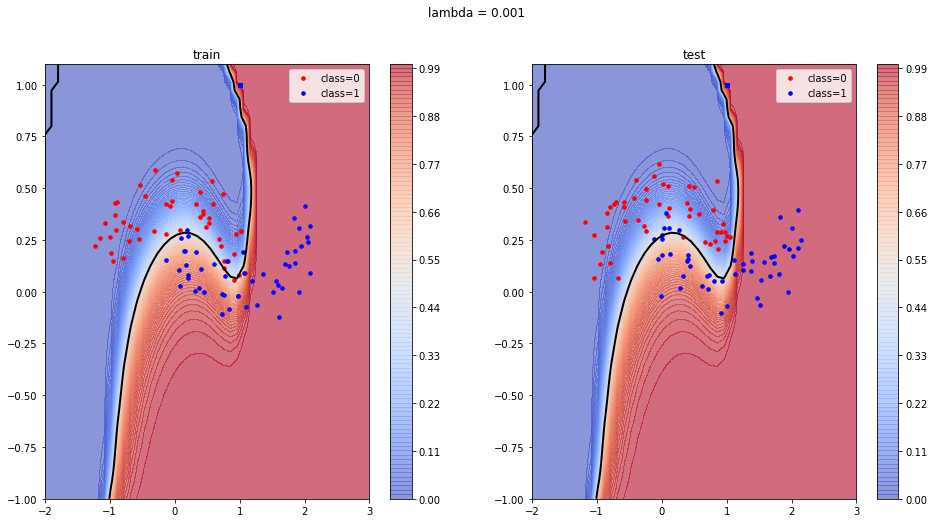

In [21]:
fig = plt.figure(8,figsize=(16, 8))

plt.subplot(1,2,1)
ax = plt.contourf(xx1,xx2,p2_3,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_3, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('train')

plt.subplot(1,2,2)
ax = plt.contourf(xx1,xx2,p2_3,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test[idx_class1_test], x2_test[idx_class1_test], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_3, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('test')

fig.suptitle(f'lambda = 0.001')
plt.show()

## 11. Plot the probability map of the obtained classifier with λ=0.01

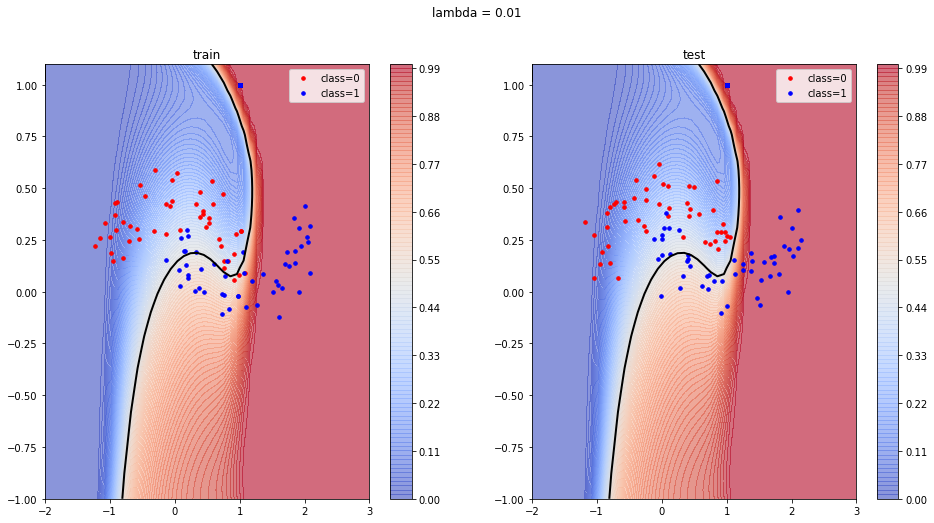

In [22]:
fig = plt.figure(10,figsize=(16, 8))

plt.subplot(1,2,1)
ax = plt.contourf(xx1,xx2,p2_4,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_4, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('train')

plt.subplot(1,2,2)
ax = plt.contourf(xx1,xx2,p2_4,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test[idx_class1_test], x2_test[idx_class1_test], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_4, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('test')

fig.suptitle(f'lambda = 0.01')
plt.show()

## 12. Plot the probability map of the obtained classifier with λ=0.1

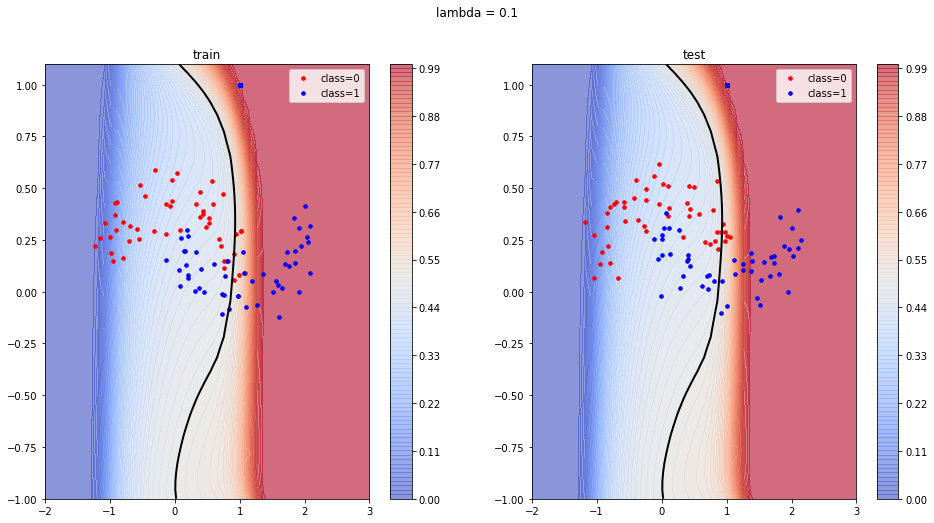

In [23]:
fig = plt.figure(12,figsize=(16, 8))

plt.subplot(1,2,1)
ax = plt.contourf(xx1,xx2,p2_5,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_5, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('train')

plt.subplot(1,2,2)
ax = plt.contourf(xx1,xx2,p2_5,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()
plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test[idx_class1_test], x2_test[idx_class1_test], s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p2_5, levels=1, linewidths=2, colors='k') 
plt.legend(loc=1)
plt.title('test')

fig.suptitle(f'lambda = 0.1')
plt.show()

## 13. Print the final training accuracy with the given regularization parameters

In [30]:
print('lambda       Training Accuracy(%)')
print('0.00001:     ',  get_acc(pred1, idx))
print('0.0001:      ',  get_acc(pred2, idx))
print('0.001:       ',  get_acc(pred3, idx))
print('0.01:        ',  get_acc(pred4, idx))
print('0.1:         ',  get_acc(pred5, idx))

lambda       Training Accuracy(%)
0.00001:      98.0
0.0001:       98.0
0.001:        97.5
0.01:         94.0
0.1:          85.5


## 14. Print the final testing accuracy with the given regularization parameters

In [31]:
# compute the accuracy of the classifier
idx = y_test

print('lambda       Testing Accuracy(%)')
print('0.00001:     ',  get_acc(pred1_test, idx))
print('0.0001:      ',  get_acc(pred2_test, idx))
print('0.001:       ',  get_acc(pred3_test, idx))
print('0.01:        ',  get_acc(pred4_test, idx))
print('0.1:         ',  get_acc(pred5_test, idx))

lambda       Testing Accuracy(%)
0.00001:      97.0
0.0001:       97.0
0.001:        96.5
0.01:         95.0
0.1:          86.5
